# Law of large numbers 

### 1) Plot the mean of a Poisson random variable, and compare with the true mean $\mu$

Recall that the probability density function for the Poisson process is 

$$ f_\mu (x) = \frac{e^{-\mu} \mu^x}{x!},$$
with $\mu\in\mathbb{R}$ and $x\in \mathbb{N}$. 

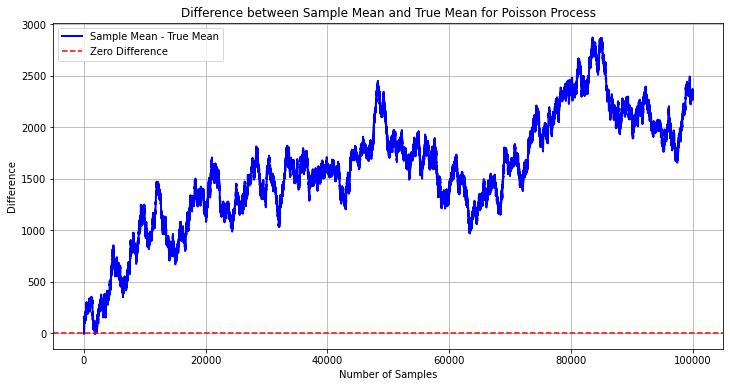

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rate parameter (average rate of events per unit time)
lambda_rate = 5.0

# Define the time interval for observation
time_interval = 10  # You can adjust this as needed

# Generate Poisson random variables
num_samples = 100000
poisson_samples = np.random.poisson(lambda_rate * time_interval, num_samples)

# Create an array to store the cumulative sample mean at each step
cumulative_mean = np.cumsum(poisson_samples) / np.arange(1, num_samples + 1)

# Calculate the true mean of the Poisson distribution
true_mean = lambda_rate * time_interval

# Calculate the difference between the sample mean and the true mean at each step
difference = cumulative_mean - true_mean


# Create a vector of integers from 0 to 1000
n_values = np.arange(0, num_samples)

# Calculate the square root of each integer using NumPy's sqrt function
sqrt_n_values = np.sqrt(n_values)

# multiply the differences by some function of n
diff_n= n_values * difference
#diff_n= sqrt_n_values * difference
#diff_n= difference

plt.figure(figsize=(12, 6))

plt.plot(np.arange(1, num_samples + 1), diff_n, color='blue', linewidth=2, label='Sample Mean - True Mean')
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.xlabel('Number of Samples')
plt.ylabel('Difference')
plt.title('Difference between Sample Mean and True Mean for Poisson Process')
plt.grid(True)
plt.legend()

plt.show()


### 2) Show by example that the histogram of samples converges to the probability density function for the Poisson process

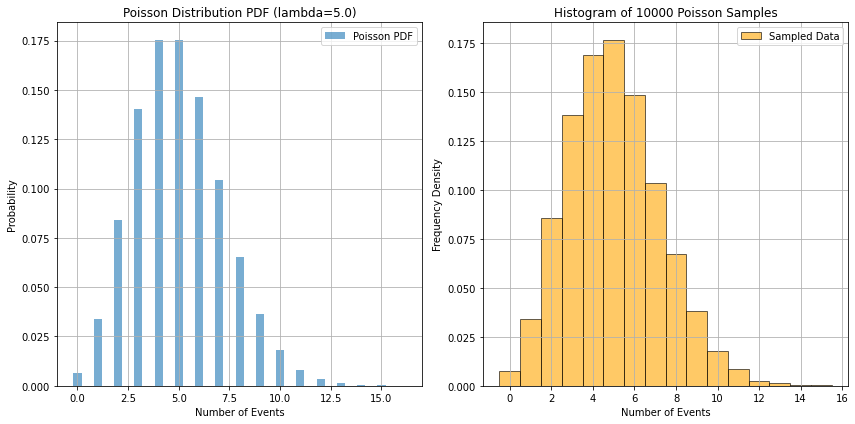

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the rate parameter (average rate of events per unit time). mu in text
lambda_rate = 5.0

# Define the time interval for observation
time_interval = 1  # You can adjust this as needed

# Generate Poisson random variables
num_samples = 10000
poisson_samples = np.random.poisson(lambda_rate * time_interval, num_samples)

# Create a range of x values for the PDF plot
x_values = np.arange(0, max(poisson_samples) + 1)

# Calculate the PMF (Probability Mass Function) of the Poisson distribution
poisson_pmf = poisson.pmf(x_values, lambda_rate * time_interval)

# Plot the PDF of the Poisson distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(x_values, poisson_pmf, width=0.4, label='Poisson PDF', alpha=0.6)
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution PDF (lambda={lambda_rate * time_interval})')
plt.grid(True)
plt.legend()

# Plot a histogram of the generated samples
plt.subplot(1, 2, 2)
plt.hist(poisson_samples, bins=np.arange(0, max(poisson_samples) + 1) - 0.5, density=True, alpha=0.6,
         label='Sampled Data', color='orange', edgecolor='black')
plt.xlabel('Number of Events')
plt.ylabel('Frequency Density')
plt.title(f'Histogram of {num_samples} Poisson Samples')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Central Limit theorem

### 3) Plot the distribution of the sample mean vs the mean for the exponential distribution 

Recall that the exponential distribution has probability density function

$$ f_\lambda(x) = \lambda e^{-\lambda x},$$
for $\lambda>0$ and $x\geq 0$. 

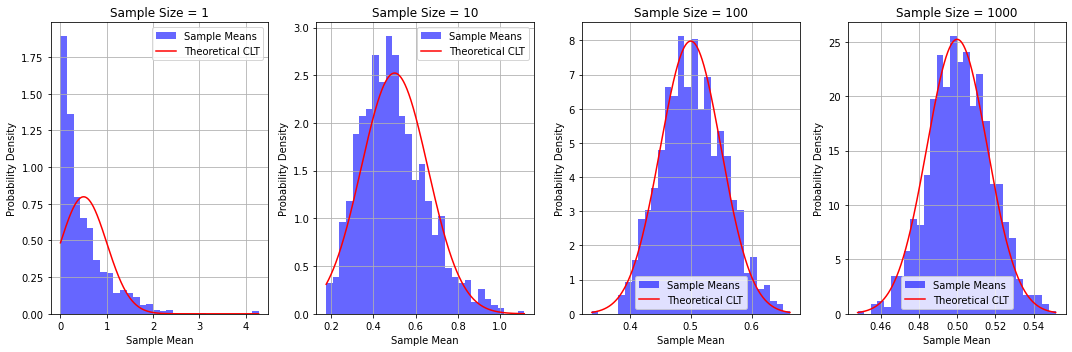

In [64]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

# Set a seed for reproducibility
np.random.seed(0)

# Define the parameters for the population distribution (exponential)
population_lambda = 2  # Rate parameter (inverse of mean)

# Generate a random population from an exponential distribution
population = expon.rvs(scale=1/population_lambda, size=1000)

# Define parameters for the sampling distribution
sample_sizes = [1,10, 100,1000]  # Different sample sizes to demonstrate CLT

# Initialize an array to store sample means for each sample size
sample_means = {}

# Generate random samples and calculate their means for each sample size
for sample_size in sample_sizes:
    sample_means[sample_size] = [np.mean(np.random.choice(population, size=sample_size)) for _ in range(1000)]

# Create subplots to show histograms for different sample sizes
plt.figure(figsize=(15, 5))
for i, sample_size in enumerate(sample_sizes):
    plt.subplot(1, len(sample_sizes), i + 1)
    plt.hist(sample_means[sample_size], bins=30, density=True, alpha=0.6, color='b', label='Sample Means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    plt.title(f'Sample Size = {sample_size}')
    plt.grid(True)

    # Plot the theoretical normal distribution for sample means
    expected_mean = 1 / population_lambda
    expected_stddev = np.sqrt((1 / population_lambda**2) / sample_size)
    x = np.linspace(min(sample_means[sample_size]), max(sample_means[sample_size]), 1000)
    pdf = norm.pdf(x, loc=expected_mean, scale=expected_stddev)
    plt.plot(x, pdf, 'r', label='Theoretical CLT')

    # Add a legend
    plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Multivariate Gaussians

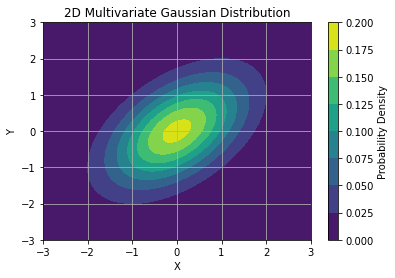

In [66]:
# We start by visualizing the pdf of the 2D Gaussian 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set mean and covariance matrix
mean = np.array([0, 0])  # Mean of the distribution
cov = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix

# Create a grid of points
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))

# Evaluate the PDF at each point in the grid
pdf = multivariate_normal.pdf(pos, mean=mean, cov=cov)


# Create a contour plot of the PDF
plt.contourf(x, y, pdf, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Multivariate Gaussian Distribution')
plt.grid(True)
plt.show()

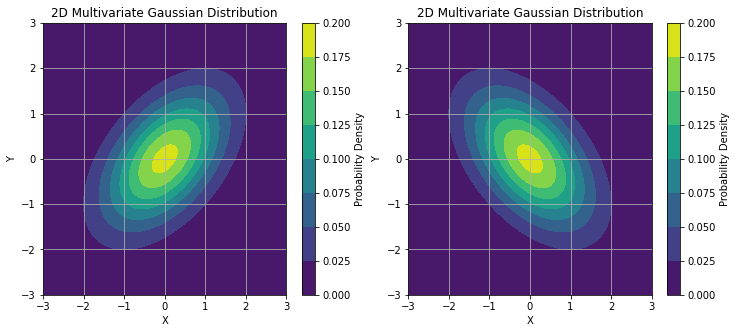

In [68]:
#rotation angle in gradients
theta=np.pi/2

#rotation matrix
R=np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])

#Rotated covariance matrix
covR = np.dot(R.T,np.dot(cov,R))

# Create a grid of points
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))

# Evaluate the PDF at each point in the grid
pdfR = multivariate_normal.pdf(pos, mean=mean, cov=covR)


# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x, y, pdf, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Multivariate Gaussian Distribution')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.contourf(x, y, pdfR, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Multivariate Gaussian Distribution')
plt.grid(True)

#plt.tight_layout()
plt.show()